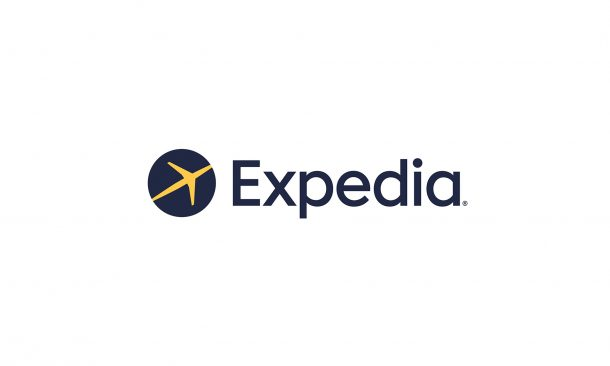

# **Clustering Expedia Customers Based on Booking Behavior**

### 🧭 Project Overview

This project aims to segment Expedia customers based on their booking behavior using clustering techniques. By understanding different user types—such as frequent travelers, last-minute bookers, or exploratory clickers—we can uncover meaningful behavioral patterns.

**Why Clustering?**
- Expedia collects large volumes of behavioral data from users.
- Clustering helps identify distinct groups based on behavior, without pre-labeled outcomes.
- These insights can drive better personalization, promotions, and recommendations.

**Goal:**  
Use unsupervised learning techniques to group users into distinct clusters and interpret the behavior of each segment.


### **1. Read Data**

In [1]:
# 📦 Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Scikit-learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.utils import resample
from sklearn.neighbors import kneighbors_graph

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('travel.csv')

In [3]:
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.\n\n')
data.head()

The data has 100000 rows and 25 columns.




,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,0,9,2014-08-03,2014-08-08,2,1,1,12812,5,0,1,2,50,368,83


**Missing values and duplicates**

In [4]:
# Check missing values
print("Missing Values :\n")
print(data.isnull().sum())

# Check duplicate rows
print("\nDuplicate Rows:")
print(data.duplicated().sum())

Missing Values :

Unnamed: 0                       0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36085
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

Duplicate Rows:
0


In [5]:
print(f'Number of unique values in the dataset: \n\n {data.nunique()}')

Number of unique values in the dataset: 

 Unnamed: 0                   100000
date_time                     99886
site_name                        41
posa_continent                    5
user_location_country           201
user_location_region            779
user_location_city            10779
orig_destination_distance     62206
user_id                       88863
is_mobile                         2
is_package                        2
channel                          11
srch_ci                        1066
srch_co                        1068
srch_adults_cnt                  10
srch_children_cnt                10
srch_rm_cnt                       9
srch_destination_id            8827
srch_destination_type_id          8
is_booking                        2
cnt                              32
hotel_continent                   7
hotel_country                   178
hotel_market                   1843
hotel_cluster                   100
dtype: int64


In [6]:
data.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,5.858590,2.020710,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,3.722823,0.909774,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,10.000000,9.000000,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


**Key Observations**
- There is a column, 'Unnamed: 0', whose meaning is not clear.
- There are date and datetime columns ('date_time', 'srch_ci' and 'srch_co') that will have to be converted either into a different format or split into year, day and month.
- There are some very large numbers, that might have to be scaled.

### **2. Cleaning Data**

In [7]:
# Handling Unknown column
data = data.drop(columns=['Unnamed: 0'],axis=1)

In [8]:
# Changing the column type to datetime type using pandas
data['srch_co']   = pd.to_datetime(data['srch_co'], errors='coerce')
data['srch_ci']   = pd.to_datetime(data['srch_ci'], errors='coerce')
data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce')

In [9]:
# Logical Checks

# Drop rows where check-in is after check-out, or check-in is before booking date, or any missing dates
data = data[
    (data['srch_ci'] < data['srch_co']) & 
    (data['date_time'] < data['srch_ci']) &
    data['srch_ci'].notnull() & 
    data['srch_co'].notnull() & 
    data['date_time'].notnull()
]

# Remove invalid guest entries
data = data[(data['srch_adults_cnt'] > 0) & (data['srch_children_cnt'] >= 0) & (data['srch_rm_cnt'] > 0)]

print("Cleaned shape:", data.shape)

Cleaned shape: (96355, 24)


### **3. EDA**


In [10]:
# Create time-based features (if not already created)
data['year'] = pd.to_datetime(data['date_time']).dt.year
data['month'] = pd.to_datetime(data['date_time']).dt.month

# Group data for line plots
monthly_data = data.groupby(['year', 'month']).agg(
    bookings_per_month=('is_booking', 'sum')
).reset_index()

# Create proper datetime for plotting
monthly_data['year_month'] = pd.to_datetime(monthly_data[['year', 'month']].assign(day=1))

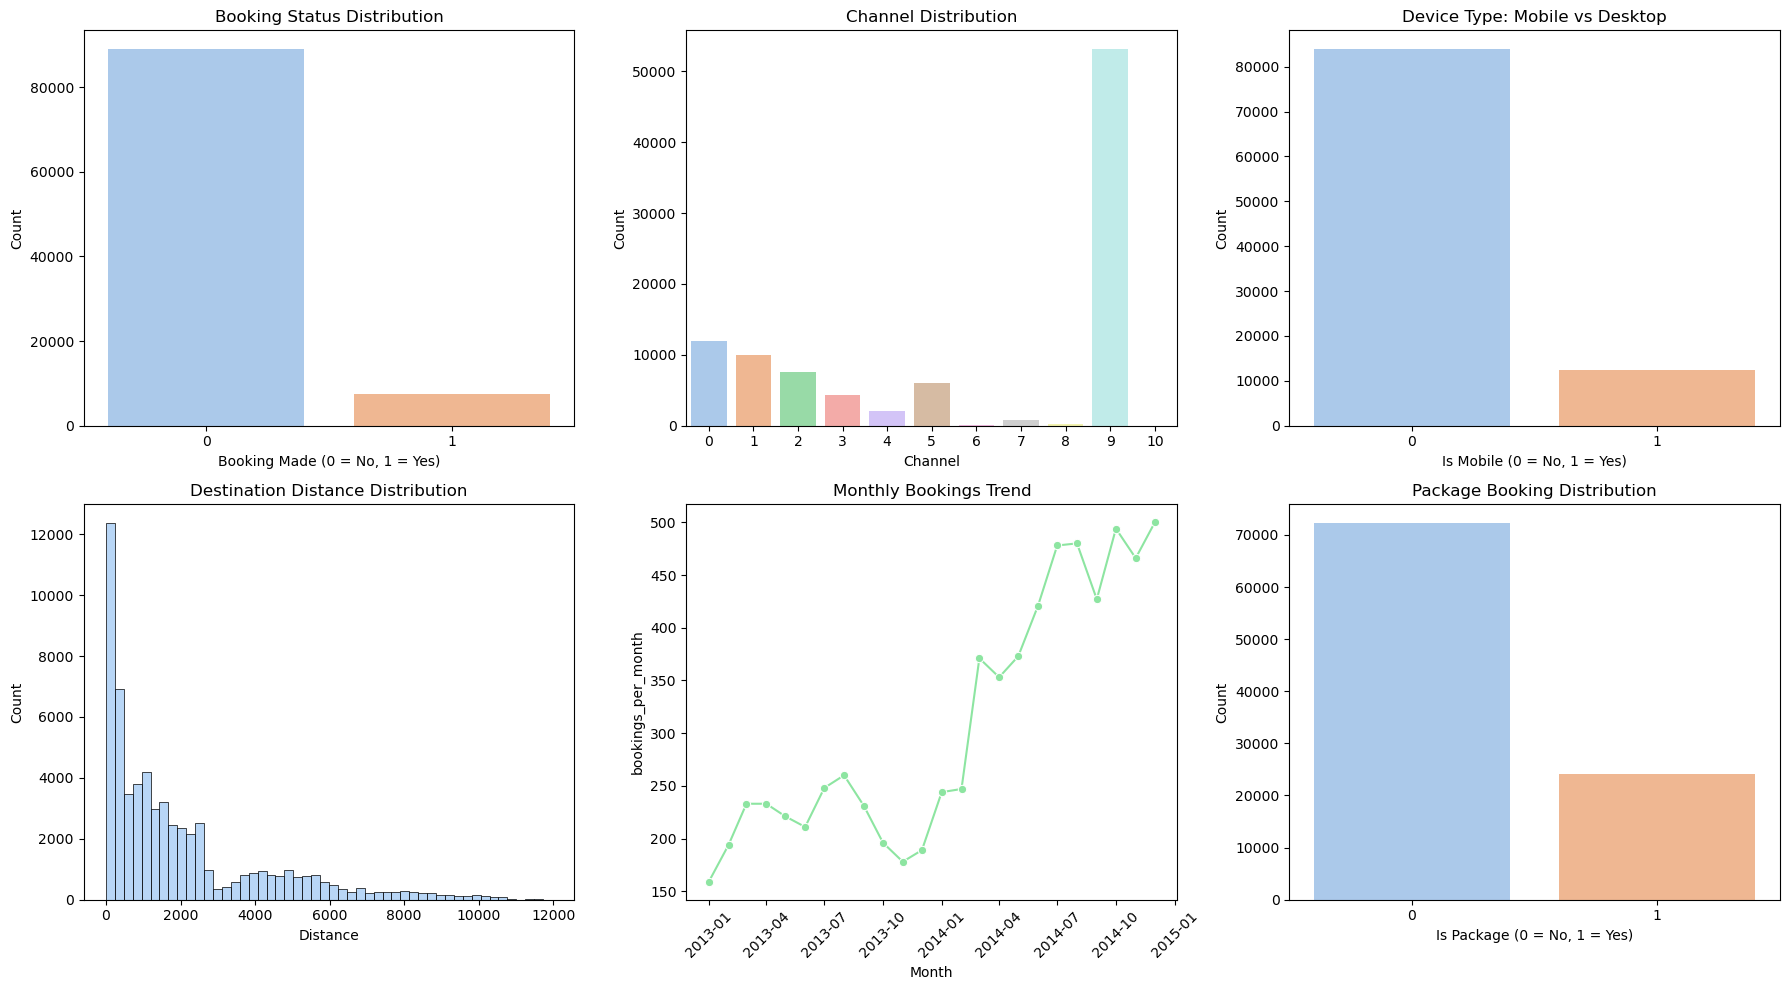

In [11]:
# Plotting various EDA distributions

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
pastel_palette = sns.color_palette("pastel")

# ---------- ROW 1 ----------

# 1. Booking Status
sns.countplot(x='is_booking', data=data, palette=pastel_palette, ax=axes[0, 0])
axes[0, 0].set_title('Booking Status Distribution')
axes[0, 0].set_xlabel('Booking Made (0 = No, 1 = Yes)')
axes[0, 0].set_ylabel('Count')

# 2. Channel Used
sns.countplot(x='channel', data=data, palette=pastel_palette, ax=axes[0, 1])
axes[0, 1].set_title('Channel Distribution')
axes[0, 1].set_xlabel('Channel')
axes[0, 1].set_ylabel('Count')

# 3. Device Usage
sns.countplot(x='is_mobile', data=data, palette=pastel_palette, ax=axes[0, 2])
axes[0, 2].set_title('Device Type: Mobile vs Desktop')
axes[0, 2].set_xlabel('Is Mobile (0 = No, 1 = Yes)')
axes[0, 2].set_ylabel('Count')

# ---------- ROW 2 ----------

# 4. Destination Distance
sns.histplot(data['orig_destination_distance'], bins=50, ax=axes[1, 0], color=pastel_palette[0])
axes[1, 0].set_title('Destination Distance Distribution')
axes[1, 0].set_xlabel('Distance')

# 5. Bookings Over Time
sns.lineplot(data=monthly_data, x='year_month', y='bookings_per_month', marker='o', ax=axes[1, 1], color=pastel_palette[2])
axes[1, 1].set_title('Monthly Bookings Trend')
axes[1, 1].set_xlabel('Month')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Package Booking
sns.countplot(x='is_package', data=data, palette=pastel_palette, ax=axes[1, 2])
axes[1, 2].set_title('Package Booking Distribution')
axes[1, 2].set_xlabel('Is Package (0 = No, 1 = Yes)')
axes[1, 2].set_ylabel('Count')

# Show plots
plt.tight_layout()
plt.show()


**Key Observations**
- As expected, the large majority of the actions taken by the customers (or rather the potential customers) are 'clicks'.
- The majority of destinations of interest are less than 2000 kilometers (or miles?) from the customer.
- Channel 9 is the most trusted channel
- People prefer normal booking rather tahn taking a package

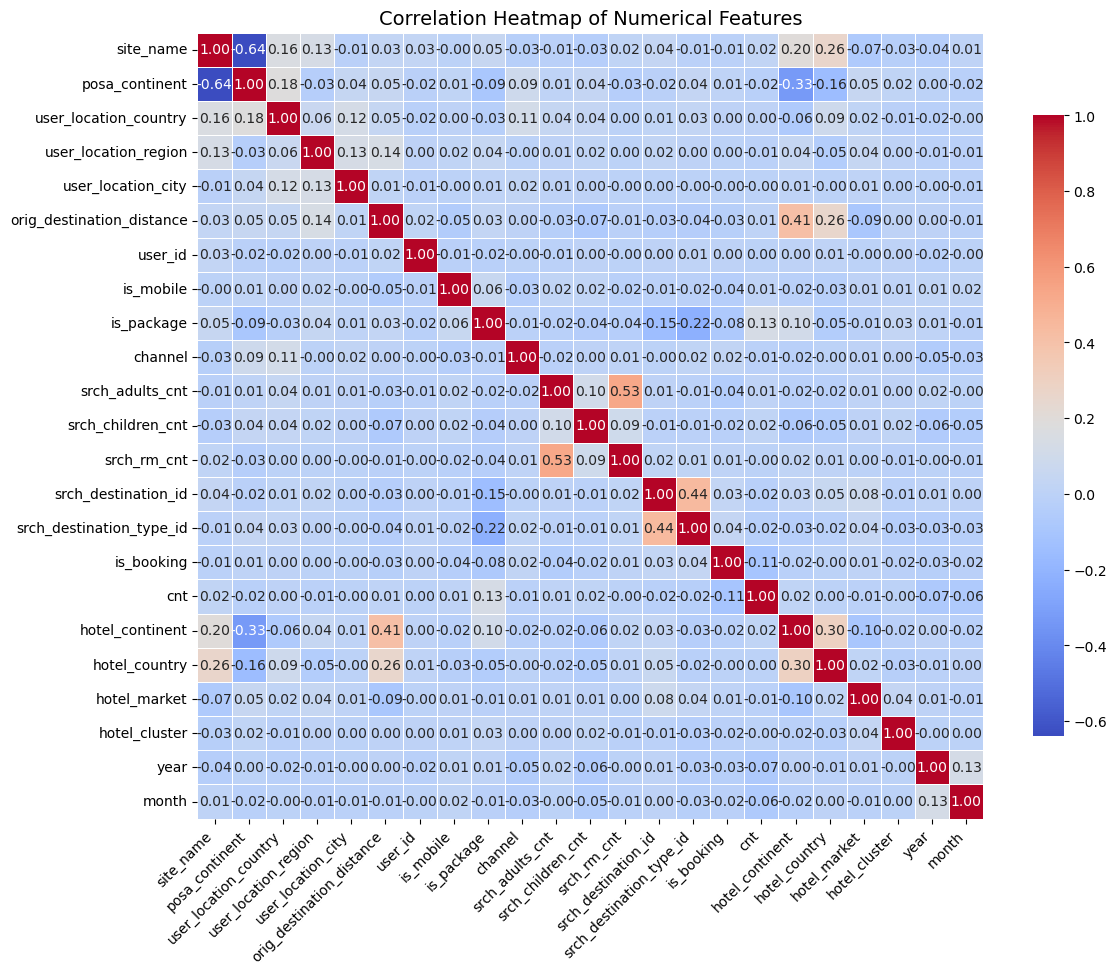

In [12]:
# 📈 Correlation Heatmap

plt.figure(figsize=(12, 10))
numeric_corr = data.corr(numeric_only=True)

sns.heatmap(
    numeric_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size": 10},     # Font size of numbers in the boxes
    cbar_kws={"shrink": 0.75},  # Colorbar size adjustment
    square=True
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()



- There is no sign of multicolinearaty as the correlations are not too high.

### **4. Feature Engineering**

In [13]:
# Aggregate behavior at the user level

# Group by user_id to get total actions, clicks, and bookings
user_behavior = data.groupby('user_id')['is_booking'].agg(
    action_count='count',                    # total appearances (clicks + bookings)
    booking_count='sum'                      # sum of 1s = total bookings
).reset_index()

# Click count = total actions - bookings
user_behavior['click_count'] = user_behavior['action_count'] - user_behavior['booking_count']

# Booking ratio = bookings / total actions
user_behavior['booking_ratio'] = user_behavior['booking_count'] / user_behavior['action_count']

# Merge this back into the main dataset (optional depending on use case)
data = data.merge(user_behavior, on='user_id', how='left')

#### Creating new columns

Defining new columns in order to make the data ready for clustering

In [14]:
# Feature 1: Travel Duration (days)
data['travel_duration'] = (data['srch_co'] - data['srch_ci']).dt.days

# Feature 2: Days in Advance (how early the booking was made)
data['days_in_advance'] = (data['srch_ci'] - data['date_time']).dt.days

In [15]:
data.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month,action_count,booking_count,click_count,booking_ratio,travel_duration,days_in_advance
0,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,2014,11,2,0,2,0.0,4,41
1,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22,2014,10,1,0,1,0.0,7,171
2,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42,2013,11,2,1,1,0.5,1,1
3,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,0,9,2014-08-03,2014-08-08,2,1,1,12812,5,0,1,2,50,368,83,2014,6,1,0,1,0.0,5,53
4,2014-01-28 13:16:36,2,3,66,337,54287,329.1833,908558,0,0,2,2014-02-27,2014-03-01,2,0,1,8287,1,1,1,2,198,400,6,2014,1,1,1,0,1.0,2,29


### **5. Cluster Analysis (K- Means)**

In [16]:
# Count how many rows each user has
user_counts = data['user_id'].value_counts()
user_entry_map = user_counts.to_dict()

# Compute user and city medians
user_medians = data.groupby('user_id')['orig_destination_distance'].median().to_dict()
city_medians = data.groupby('user_location_city')['orig_destination_distance'].median().to_dict()

# Define imputation function
def smart_impute(row):
    user_id = row['user_id']
    city_id = row['user_location_city']
    if pd.notnull(row['orig_destination_distance']):
        return row['orig_destination_distance']
    elif user_entry_map.get(user_id, 0) >= 3:
        return user_medians.get(user_id)
    else:
        return city_medians.get(city_id)

# Apply the function
data['orig_destination_distance'] = data.apply(smart_impute, axis=1)

# Create user-level aggregated features
user_behavior = data.groupby('user_id')['is_booking'].agg(
    action_count='count',
    booking_count='sum'
).reset_index()

user_behavior['click_count'] = user_behavior['action_count'] - user_behavior['booking_count']
user_behavior['booking_ratio'] = user_behavior['booking_count'] / user_behavior['action_count']

# User-averaged behavioral features
user_means = data.groupby('user_id').agg({
    'travel_duration': 'mean',
    'days_in_advance': 'mean',
    'orig_destination_distance': 'mean',
    'srch_adults_cnt': 'mean',
    'srch_children_cnt': 'mean',
    'srch_rm_cnt': 'mean'
}).reset_index()

# Merge all into a single user profile dataset
user_profile = pd.merge(user_behavior, user_means, on='user_id', how='inner')

# Final cleanup
user_profile.dropna(inplace=True)

# Preview the data
user_profile.head()


,user_id,action_count,booking_count,click_count,booking_ratio,travel_duration,days_in_advance,orig_destination_distance,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,14,1,0,1,0.0,2.0,53.0,2265.9330,1.0,0.0,1.0
1,38,1,0,1,0.0,4.0,122.0,480.7833,2.0,0.0,1.0
2,40,1,0,1,0.0,1.0,0.0,2576.2959,1.0,0.0,1.0
3,156,2,0,2,0.0,1.0,13.0,1128.0887,3.0,1.0,1.0
4,160,1,0,1,0.0,1.0,90.0,1540.1637,5.0,0.0,1.0


- Selecting Features to cluster on should be guided by one's business domain knowledge. We have used some of the most important features.

In [17]:
# Select features to cluster on
features_for_clustering = user_profile.drop(columns=['user_id'])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

#### **Elbow method**

  File "c:\Users\aksh0\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\aksh0\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aksh0\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\aksh0\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


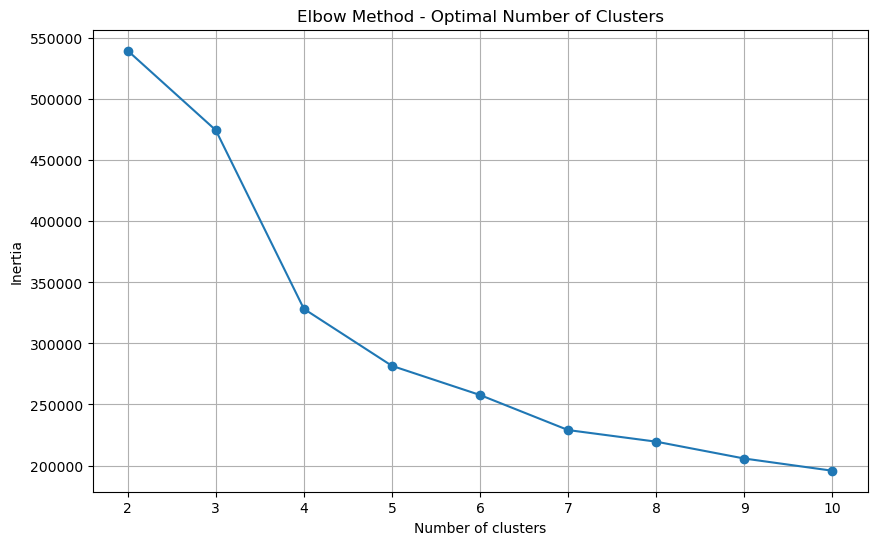

In [18]:
# Try different k values
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


- To determine the optimal number of clusters, we applied the elbow method, which plots the inertia (the sum of squared distances between data points and their assigned cluster centers) against varying values of k.

- The plot showed a sharp decrease in inertia from k = 2 to k = 4, after which the rate of decrease slows considerably — forming a visible "elbow" at k = 4.

- This indicates that 4 clusters strike the right balance between compactness within clusters and simplicity of the model. 

#### **Silhouette score**

Another method to estimate the optimal number of clusters is that of the silhouette score.

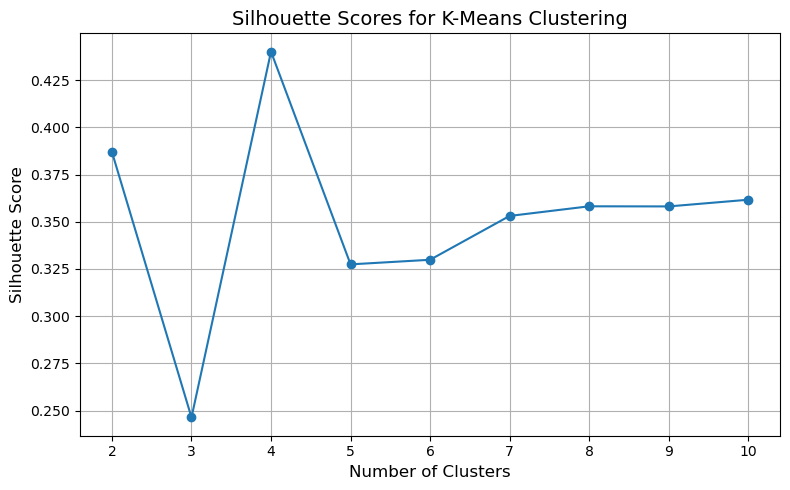

In [19]:
silhouette_scores = []
range_clusters = range(2, 11)

# Loop through different values of k
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)  # use the scaled user features
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Scores for K-Means Clustering", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

- According to the silhouette analysis of the clusters, the highest score is at k = 4

- The silhouette scores are not very high, but not super low either.

In [20]:
# Final KMeans with k=4
kmeans_final = KMeans(n_clusters=4, random_state=42)
user_profile['cluster'] = kmeans_final.fit_predict(scaled_features)

In [21]:
# Compute Davies-Bouldin score & silhouette score using the final KMeans clusters
sil_score = silhouette_score(scaled_features, user_profile['cluster'])
db_score = davies_bouldin_score(scaled_features, user_profile['cluster'])

print(f"Silhouette Score:        {sil_score:.4f}")
print(f"Davies-Bouldin Score:    {db_score:.4f}")


Silhouette Score:        0.4401
Davies-Bouldin Score:    1.0662


#### **PCA (2D & 3D)**

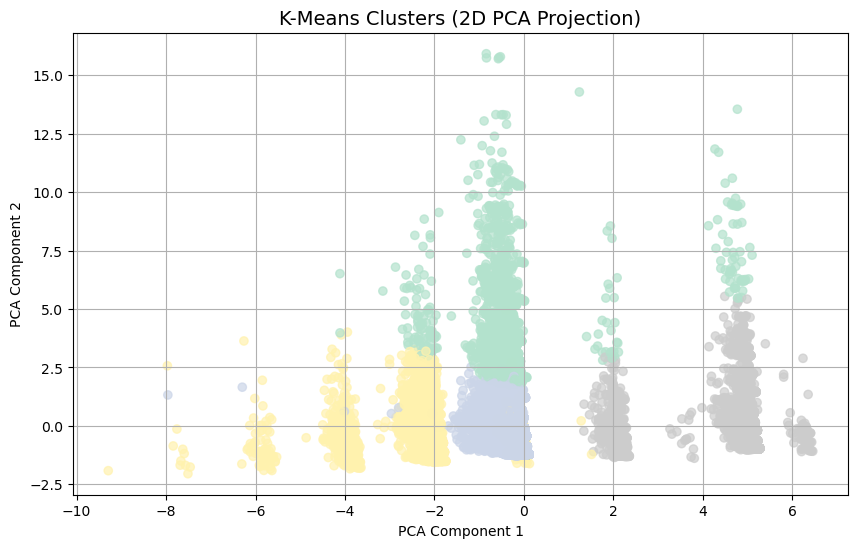

In [22]:
# Apply PCA to reduce to 2 components
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(scaled_features)

# Plot the 2D PCA scatter
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], c=user_profile['cluster'], cmap='Pastel2', alpha=0.7)
plt.title('K-Means Clusters (2D PCA Projection)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

*This 2D PCA projection helps visualize how KMeans has segmented users.*
- We can see that the clusters form fairly distinct vertical groupings, especially along the first principal component. 
- Some overlap can be seen between clusters which is quite normal since we are clustering on the basis of customer behaviour which can tend to be similar in some aspects. 
- This supports that the user features we used have meaningful structure, and KMeans was able to pick up on it.

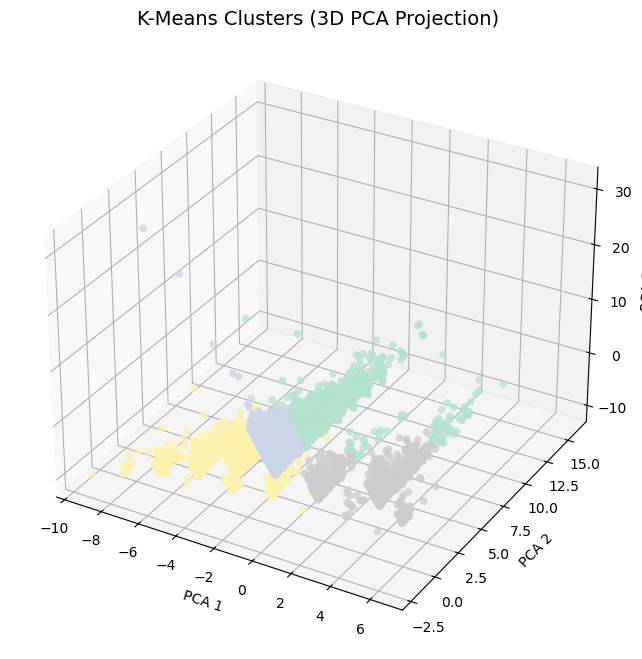

In [24]:
# Apply PCA to reduce to 3 components
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(scaled_features)

# Plot 3D scatter
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2],
                     c=user_profile['cluster'], cmap='Pastel2', alpha=0.7)

ax.set_title('K-Means Clusters (3D PCA Projection)', fontsize=14)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()


- The 3D PCA projection gives us a deeper view of the clustering structure. It shows that the separation among clusters becomes even more noticeable when we include the third principal component. 
- While clusters do stretch along some axes, there's still some level of separation, validating the quality of the KMeans segmentation

### **6. Agglomerating Clusters**

In [25]:
# Sample 40000 users from the full dataset
user_sample = resample(user_profile, n_samples=40000, random_state=42)

# Drop cluster columns if already exist from KMeans
user_sample = user_sample.drop(columns=['cluster', 'agglo_cluster'], errors='ignore')

In [26]:
# Define features for clustering
features = ['action_count', 'booking_count', 'click_count', 'booking_ratio',
            'travel_duration', 'days_in_advance',
            'orig_destination_distance', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

# Scale features
scaler = StandardScaler()
sample_scaled = scaler.fit_transform(user_sample[features])

In [27]:
# Apply Agglomerative Clustering with k=4 
connectivity = kneighbors_graph(sample_scaled, n_neighbors=10, include_self=False)
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(sample_scaled)

# Add labels to a copy of user_profile
user_sample['agglo_cluster'] = agglo_labels

In [28]:
# Silhouette Score
agglo_sil = silhouette_score(sample_scaled, agglo_labels)
agglo_db = davies_bouldin_score(sample_scaled, agglo_labels)

print(f"Agglomerative Clustering: (40000 users sampled)")
print(f" - Silhouette Score:     {agglo_sil:.4f}")
print(f" - Davies-Bouldin Score: {agglo_db:.4f}")


Agglomerative Clustering: (40000 users sampled)
 - Silhouette Score:     0.4303
 - Davies-Bouldin Score: 1.0987


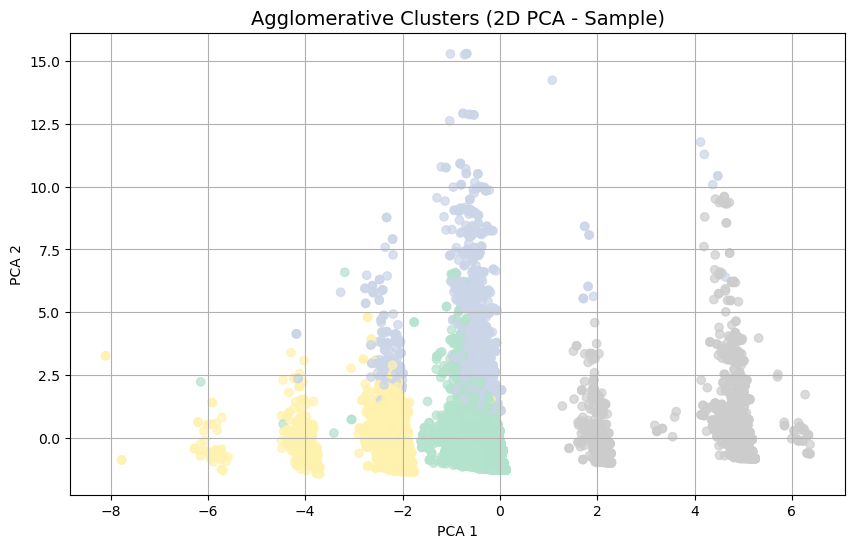

In [29]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sample_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=user_sample['agglo_cluster'], cmap='Pastel2', alpha=0.7)
plt.title('Agglomerative Clusters (2D PCA - Sample)', fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

- This plot shows how Agglomerative Clustering groups users in PCA-reduced space. 
- The separation between clusters is slightly different than KMeans, but we still observe distinct vertical groupings. 
- This tells us that Agglomerative also found meaningful subgroups in the data, though the structure is slightly more blended in some areas.

### **7. Final Clusters**

In [30]:
kmeans_summary = user_profile.groupby('cluster')[['travel_duration', 'days_in_advance', 'orig_destination_distance']].mean().reset_index()
kmeans_summary['method'] = 'KMeans'
kmeans_summary = kmeans_summary.rename(columns={'cluster': 'cluster_id'})

agglo_summary = user_sample.groupby('agglo_cluster')[['travel_duration', 'days_in_advance', 'orig_destination_distance']].mean().reset_index()
agglo_summary['method'] = 'Agglomerative'
agglo_summary = agglo_summary.rename(columns={'agglo_cluster': 'cluster_id'})


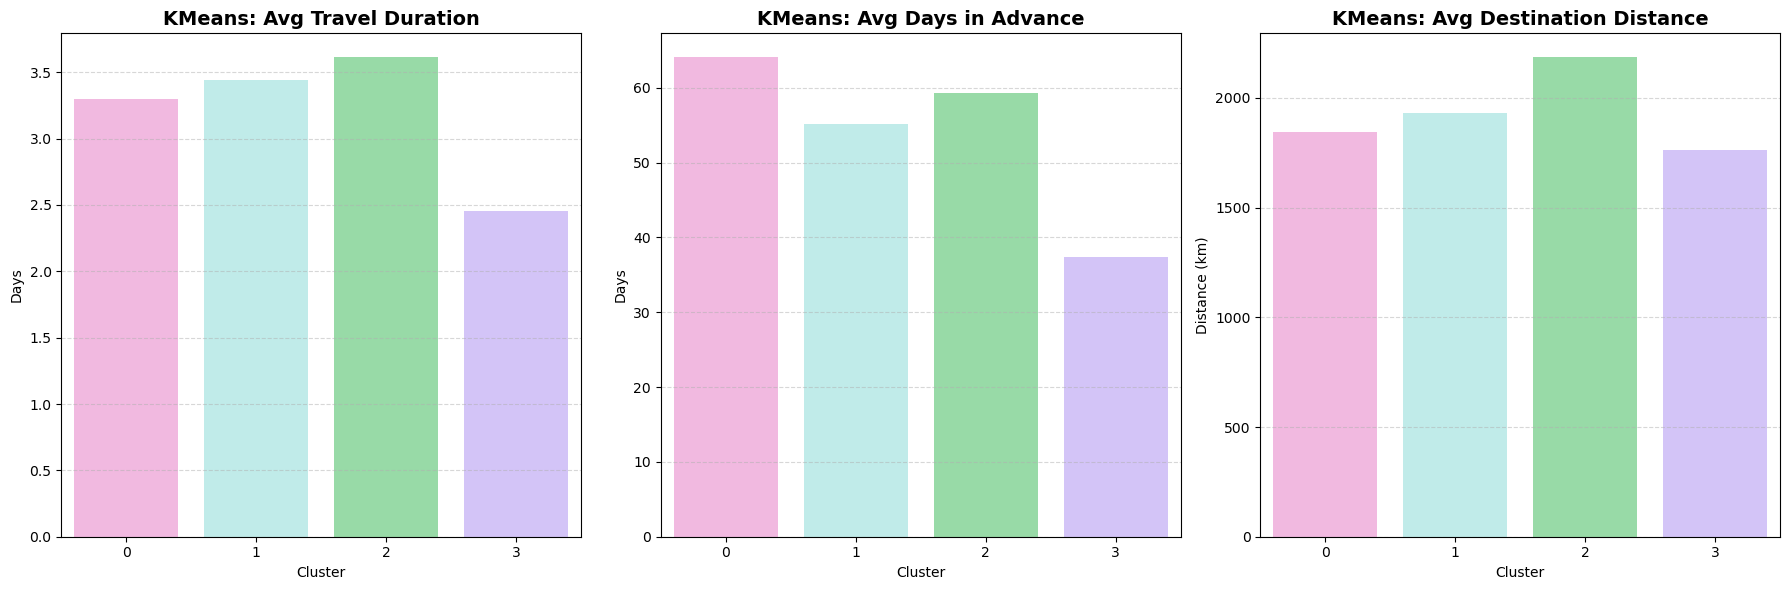

In [31]:
# Summary for KMeans
kmeans_summary = user_profile.groupby('cluster')[['travel_duration', 'days_in_advance', 'orig_destination_distance']].mean().reset_index()

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
pastel_colors = [sns.color_palette("pastel")[i] for i in [6, 9, 2, 4]]

# Travel Duration
sns.barplot(data=kmeans_summary, x='cluster', y='travel_duration', ax=ax1, palette=pastel_colors)
ax1.set_title("KMeans: Avg Travel Duration", fontsize=14, fontweight='bold')
ax1.set_xlabel("Cluster")
ax1.set_ylabel("Days")
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Days in Advance
sns.barplot(data=kmeans_summary, x='cluster', y='days_in_advance', ax=ax2, palette=pastel_colors)
ax2.set_title("KMeans: Avg Days in Advance", fontsize=14, fontweight='bold')
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Days")
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Distance
sns.barplot(data=kmeans_summary, x='cluster', y='orig_destination_distance', ax=ax3, palette=pastel_colors)
ax3.set_title("KMeans: Avg Destination Distance", fontsize=14, fontweight='bold')
ax3.set_xlabel("Cluster")
ax3.set_ylabel("Distance (km)")
ax3.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


- Travel Duration: Cluster 2 has the longest trips (~3.6 days), suggesting they might be holiday or long-distance travelers. Cluster 3 has the shortest (~2.4 days), possibly weekend or local trips.

- Days in Advance: Cluster 0 books well in advance (~64 days), showing planner-like behavior. Cluster 3 books late (~37 days), likely spontaneous or opportunistic.

- Destination Distance: Cluster 2 again stands out with the longest distances (~2200 km), likely long-haul travelers. Cluster 3 travels shorter distances (~1750 km), consistent with local behavior.

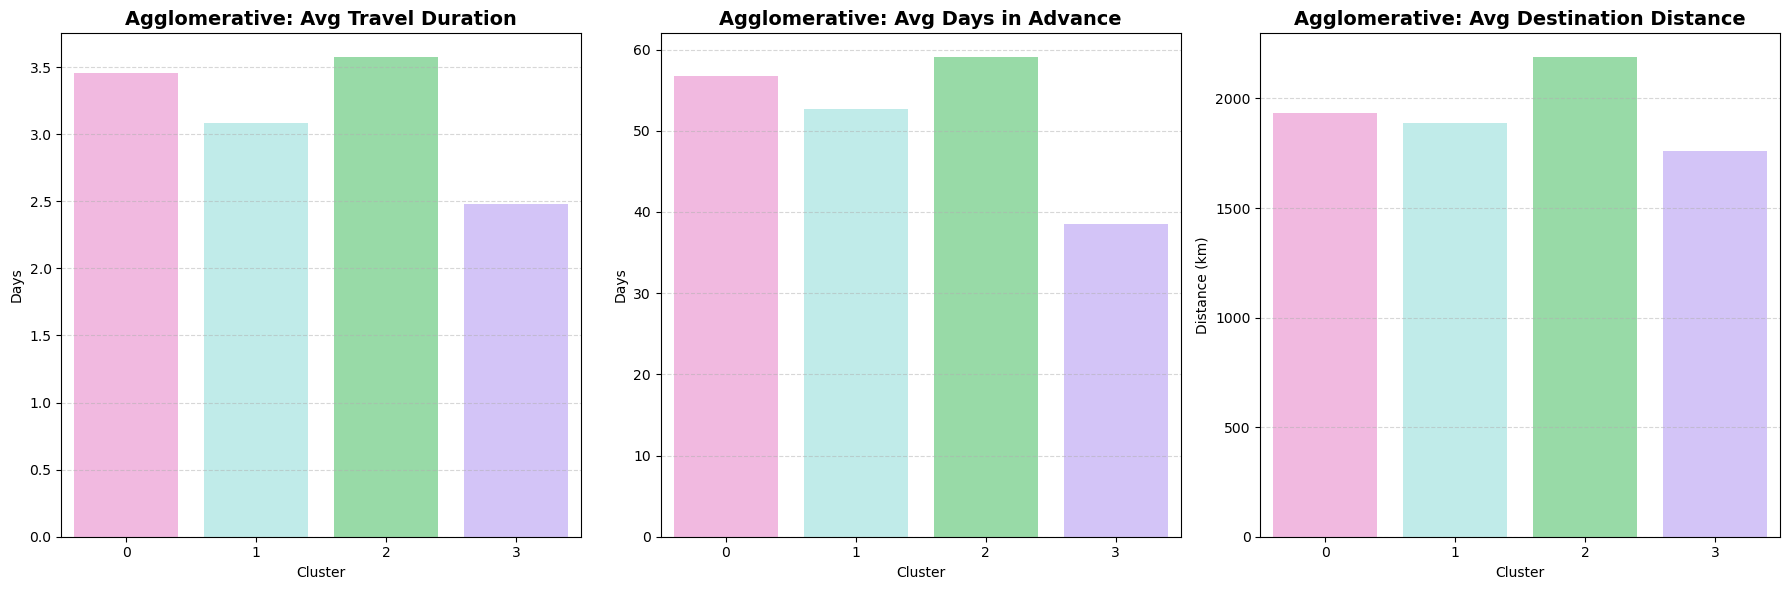

In [32]:
# Summary for Agglomerative
agglo_summary = user_sample.groupby('agglo_cluster')[['travel_duration', 'days_in_advance', 'orig_destination_distance']].mean().reset_index()

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
pastel_colors = [sns.color_palette("pastel")[i] for i in [6, 9, 2, 4]]

# Travel Duration
sns.barplot(data=agglo_summary, x='agglo_cluster', y='travel_duration', ax=ax1, palette=pastel_colors)
ax1.set_title("Agglomerative: Avg Travel Duration", fontsize=14, fontweight='bold')
ax1.set_xlabel("Cluster")
ax1.set_ylabel("Days")
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Days in Advance
sns.barplot(data=agglo_summary, x='agglo_cluster', y='days_in_advance', ax=ax2, palette=pastel_colors)
ax2.set_title("Agglomerative: Avg Days in Advance", fontsize=14, fontweight='bold')
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Days")
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Distance
sns.barplot(data=agglo_summary, x='agglo_cluster', y='orig_destination_distance', ax=ax3, palette=pastel_colors)
ax3.set_title("Agglomerative: Avg Destination Distance", fontsize=14, fontweight='bold')
ax3.set_xlabel("Cluster")
ax3.set_ylabel("Distance (km)")
ax3.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


- Travel Duration & Distance: Cluster 2 again takes the longest trips and travels the furthest.

- Days in Advance: Cluster 0 still books far in advance, while Cluster 3 is consistently the last-minute, local trip group.

- Behavioral match: The clusters found by Agglomerative closely mirror those from KMeans, adding robustness to our segmentation.

**Final Word**

- After comparing both methods, K-Means clustering performed better than Agglomerative Clustering. While both gave similar results in terms of silhouette score and Davies-Bouldin index, it’s important to note that K-Means was applied to the full dataset, whereas Agglomerative was only run on half. This gave K-Means more data to work with, which likely helped it find more meaningful patterns.

- Talking about the clusters formed by K means:

    1. **Cluster 0 :** represents users who tend to plan their trips well in advance. On average, they have a decent travel duration — not too short, not too long — and they usually travel to destinations that are relatively nearby. This group might include older travelers or retired individuals who have the flexibility to book early and prefer comfortable, local travel.

    2. **Cluster 1:** falls somewhere in the middle for all travel features. These users don’t book super early but still plan ahead, and they tend to travel longer distances. This could represent families or group travelers who plan holidays in advance but aren’t overly rigid with timelines. Since they travel farther, they might even be taking international vacations.

    3. **Cluster 2:** is made up of users who travel the farthest and stay the longest. They don’t necessarily book very early, but they do plan ahead more than last-minute travelers. These could be long-distance or international travelers — possibly business professionals or people taking extended holidays — who need to be sure of their plans before booking due to the higher cost or complexity.

    4. **Cluster 3:** includes users who book their trips close to their travel date. They also take shorter trips and travel shorter distances. These are likely last-minute or spontaneous travelers — possibly people on quick work-related trips or local weekend getaways.


In this project, we used unsupervised learning to identify different types of travelers based on their behavior using Expedia search and booking data. We started by cleaning the dataset, handling missing values, converting date fields, and filtering out invalid records. Through feature engineering, we created meaningful variables such as travel_duration, days_in_advance, and booking_ratio that helped capture the planning and travel patterns of each user.
This project shows how clustering techniques can turn raw behavioral data into actionable insights. 

- Personalize their recommendations

- Tailor marketing campaigns

- Understand customer intent more clearly